# 0. Prepare

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Data was stored here https://drive.google.com/file/d/1BKplKmmwrA3N1K3i3q613W6Iyc9eUbrn/view?usp=sharing

# 1. Read data

| column  | description   | 
|---|---|
|Survival   |0 = No, 1 = Yes   | 
|Pclass| 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd|
|sSex| 	Sex 	|
|Age| 	Age in years | 	
|Sibsp| 	# of siblings / spouses aboard the Titanic | 	
|Parch| 	# of parents / children aboard the Titanic |	
|Ticket| 	Ticket number| 	
|Fare| 	Passenger fare |	
|Cabin| 	Cabin number |	
|Embarked| 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton|

In [2]:
# Your path to file data may be different
train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 5. Grouping

In [4]:
# Trung bình phí (Fare) của hành khách phải trả theo từng loại vé (Pclass)?
train.groupby("Pclass")["Fare"].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [5]:
# Hành khách xuất bên (Embarked) ở đâu có tỷ lệ mua vé loại 1 nhiều nhất (Pclass)?
train[train.Pclass ==1].groupby("Embarked")["Pclass"].value_counts()

Embarked  Pclass
C         1          85
Q         1           2
S         1         127
Name: Pclass, dtype: int64

In [6]:
# Loại vé nào thu lợi nhiều nhất cho tàu Titanic?
train.groupby("Pclass").agg(Fare = ("Fare","sum"))


,Fare
Pclass,
1,18177.4125
2,3801.8417
3,6714.6951


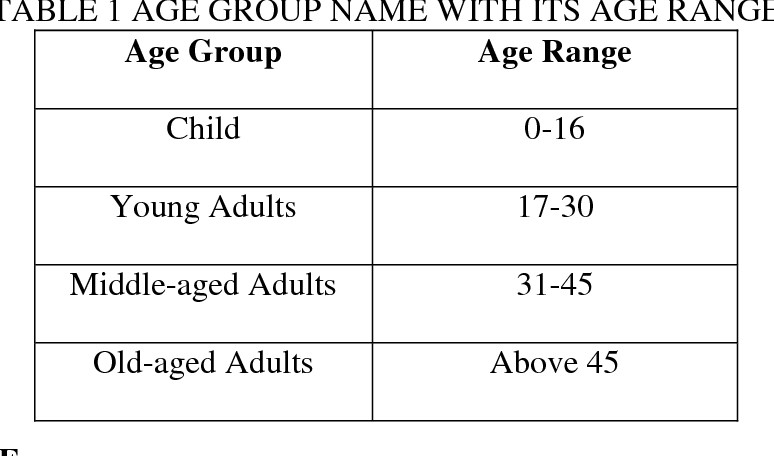

In [7]:
# # Tỷ lệ sống sót của độ tuổi nào cao nhất? 
# # Độ tuổi chia theo bảng phía trên
# # Chia tuổi thành 4 độ tuổi

# train['AgeRange'] = ''
# train.loc[train['Age'] <= 16, 'AgeRange'] = 'Child'
# train.loc[(17<= train['Age'])&(train['Age'] < 30), 'AgeRange'] = 'Young Adult'
# train.loc[(31<= train['Age'])&(train['Age'] < 45), 'AgeRange'] = 'Middle-aged Adult '
# train.loc[(train['Age'] >= 45)] = 'Old-aged Adult'
# train.head()

In [8]:
def age_range(x):
    if x in [0,16]:
        return 'Child'
    elif x in [17,30]:
        return 'Young Adults'
    elif x in [31,45]:
        return 'Middle-aged Adults'
    else:
        return 'Old-aged Adults'

In [9]:
# Tỷ lệ sống sót của độ tuổi nào cao nhất? 
# Độ tuổi chia theo bảng phía trên
# Chia tuổi thành 4 độ tuổi

train1 = train.copy()
train1.Age = train1.Age.apply(age_range)
train1

a=train1.groupby('Age').sum().Survived

b=train1.groupby('Age').count().Survived
a*100/b

Age
Child                 35.294118
Middle-aged Adults    44.827586
Old-aged Adults       38.042131
Young Adults          42.105263
Name: Survived, dtype: float64

In [10]:
# Tỷ lệ sóng sót của trẻ con đi cùng phụ huynh có cao hơn trẻ con không có phụ huynh?
pd.pivot_table(train, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


 Tuổi trung bình của những người sống sót là 28, vì vậy những người trẻ tuổi có xu hướng sống sót nhiều hơn. 
 Những người trả giá vé cao hơn có nhiều khả năng sống sót hơn, hơn gấp đôi. Đây có thể là những người đi trên khoang hạng nhất. Vì vậy, những người giàu sống sót, đó là một câu chuyện đáng buồn trong kịch bản này. 
 Trong cột thứ 3, Nếu bạn có cha mẹ, bạn có cơ hội sống sót cao hơn.
Nếu bạn là một đứa trẻ và có anh chị em, bạn sẽ có ít cơ hội sống sót hơn

# 6 Missing imputing

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
# Điền các giá trị Cabin bị thiếu bằng giá trị 'NA'
train.Cabin=train.Cabin.fillna('NA')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
# Điền các giá trị Age bị thiếu bằng tuổi trung bình theo Sex
train2 = train.copy()
Smale = (train2.Sex == 'male')
Sfemale = (train2.Sex == 'female')
train2.loc[Smale, 'Age'] = train2.loc[Smale, 'Age'].fillna(train2.loc[Smale, 'Age'].mean())
train2.loc[Sfemale, 'Age'] = train2.loc[Sfemale, 'Age'].fillna(train2.loc[Sfemale, 'Age'].mean())


In [14]:
train2.groupby('Sex').mean().Age

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [15]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
# Điền các giá trị Embarked bị thiếu bằng giá trị Embarked phổ biến nhất
train2.Embarked = train2.Embarked.fillna(train2.Embarked.value_counts().idxmax())
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 7. Your turn


In [17]:
def accuracy(df):
    return (df['Survived'] == df['Predicted']).sum()/len(df)

def predict(row):
    return 0

train['Predicted'] = train.apply(predict,axis=1)
print(accuracy(train))

0.6161616161616161


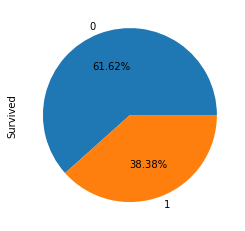

In [18]:
# %61.62% số người trên tàu Titanic đã không thể sống sót
train.Survived.value_counts().plot(kind='pie', autopct='%.2f%%');

<AxesSubplot:>

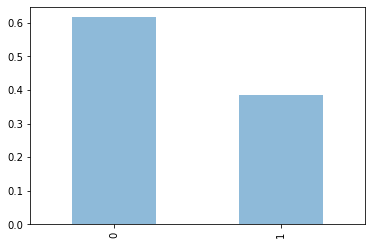

In [19]:
train.Survived.value_counts(normalize=True).plot(kind = "bar", alpha =.5)

In [20]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
train2.loc[train2["Sex"] =="male", "Sex"] = 0
train2.loc[train2["Sex"] =="female", "Sex"] = 1

In [22]:
train2.loc[train2["Embarked"] == "S", "Embarked"] = 0
train2.loc[train2["Embarked"] == "C", "Embarked"] = 1
train2.loc[train2["Embarked"] == "Q", "Embarked"] = 2

# Selection Features

In [23]:
#feature_name = ['Pclass','Age','Fare','Embarked','Sex','SibSp', 'Parch']
feature = ['Pclass','Age','Fare','SibSp', 'Parch', 'Sex','Embarked' ]
X = train2[feature].values
y = train2["Survived"]

X, y ----> X_train, X_test, y_train, y_test

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training Modeling

In [152]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42, max_depth = 4 )


In [158]:
#Fit data into model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

# Prediction

In [154]:
y_preds = clf.predict(X_test)

In [155]:
pd.DataFrame({"y": y_test, "y_preds": y_preds}).head(10)

,y,y_preds
709,1,0
439,0,0
840,0,0
720,1,1
39,1,1
290,1,1
300,1,1
333,0,0
208,1,1
136,1,1


In [156]:
score = clf.score(X_test, y_test)
print(score)

0.8208955223880597


# Evaluation

In [157]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_preds))

DecisionTrees's Accuracy:  0.8208955223880597


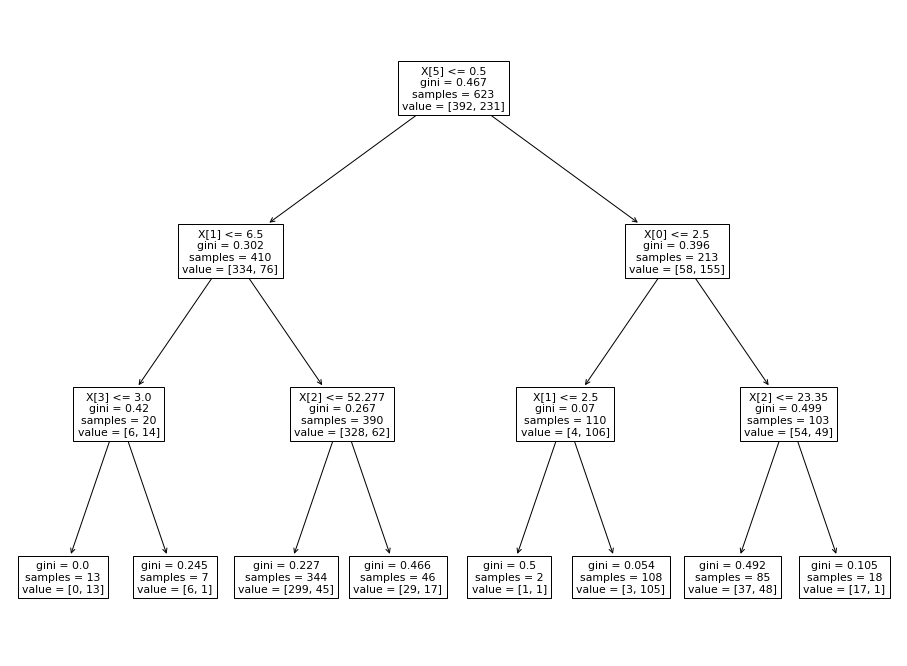

In [150]:
from sklearn import tree
plt.figure(figsize=(16,12))
tree.plot_tree(clf)
plt.show()